In [145]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [146]:
data_path = '.\eleme_output'
filename = 'eleme_b5_s15_medium_output.csv'
evaluate_data = pd.read_csv(os.path.join(data_path,filename))
grouped = evaluate_data.groupby('courier number')
dfs = [grouped.get_group(x) for x in grouped.groups]
c4d1 = dfs[1]
c5d1 = dfs[2]
c3 = dfs[0]
c3d1 = c3[c3['drone_number'] == 1]
c3d2 = c3[c3['drone_number'] == 2]
c4d1

,Instance_name,courier number,drone_number,drone_duration,objf_c,rate_c,time_c,objf_d,rate_d,time_d
1,0301_rg_2_sec_0,4,1,20,72637.56389,0.34,266.729474,64206.33507,0.28,226.443391
5,0301_rg_2_sec_1,4,1,20,42818.35554,0.00,0.000000,40719.57864,0.00,0.000000
9,0301_rg_2_sec_2,4,1,20,42782.91130,0.00,0.000000,42782.91130,0.00,0.000000
13,0301_rg_2_sec_3,4,1,20,63602.63770,0.06,177.290857,54549.03060,0.06,177.290857
17,0301_rg_2_sec_4,4,1,20,42209.67800,0.02,0.252810,32370.12515,0.00,0.000000
21,0301_rg_2_sec_5,4,1,20,41916.31133,0.00,0.000000,36816.32386,0.00,0.000000
25,0301_rg_2_sec_6,4,1,20,44886.15425,0.00,0.000000,39527.21261,0.00,0.000000
29,0301_rg_2_sec_7,4,1,20,47833.42737,0.04,8.549132,44740.11086,0.04,7.549132
33,0301_rg_2_sec_8,4,1,20,41047.06854,0.08,28.727687,31479.97619,0.04,24.811749
37,0301_rg_2_sec_9,4,1,20,41924.11856,0.02,1.747706,39135.38142,0.00,0.000000


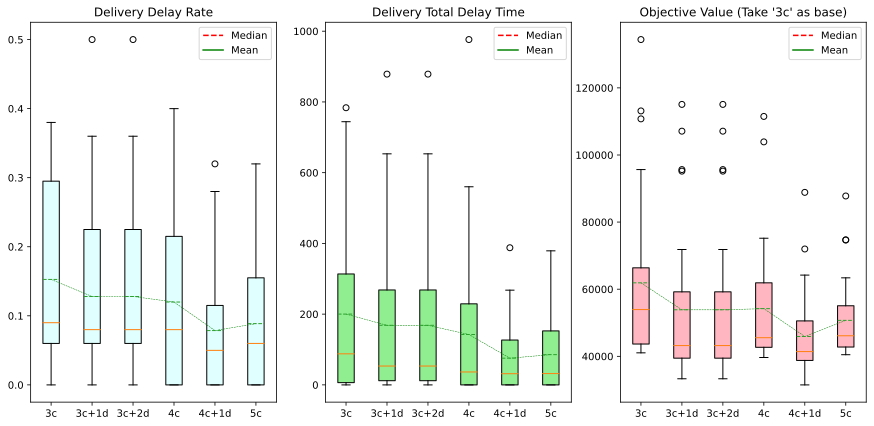

In [147]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15,7))
axs[0].set_title('Delivery Delay Rate')
axs[1].set_title('Delivery Total Delay Time')
axs[2].set_title('Objective Value (Take \'3c\' as base)')

'''图1'''
rate = np.concatenate([c3d2[['rate_c','rate_d']], c3d2[['rate_d']],c4d1[['rate_c','rate_d']],c5d1[['rate_c']]], axis=1)
labels = ['3c','3c+1d','3c+2d','4c','4c+1d','5c']
axs[0].boxplot(rate,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#E0FFFF', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(rate,axis=0)
axs[0].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
axs[0].legend(handles, labels, loc='upper right')

# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
axs[0].legend(handles, labels, loc='upper right')

'''图2'''
time = np.concatenate([c3d2[['time_c','time_d']], c3d2[['time_d']],c4d1[['time_c','time_d']],c5d1[['time_c']]], axis=1)
labels = ['3c','3c+1d','3c+2d','4c','4c+1d','5c']
axs[1].boxplot(time,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#90EE90', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(time,axis=0)
axs[1].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
axs[1].legend(handles, labels, loc='upper right')

# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
axs[1].legend(handles, labels, loc='upper right')


'''图3'''
objv = np.concatenate([c3d2[['objf_c','objf_d']], c3d2[['objf_d']],c4d1[['objf_c','objf_d']],c5d1[['objf_c']]], axis=1)
labels = ['3c','3c+1d','3c+2d','4c','4c+1d','5c']
axs[2].boxplot(objv,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#FFB6C1', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(objv,axis=0)
axs[2].plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
axs[2].legend(handles, labels, loc='upper right')

# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
axs[2].legend(handles, labels, loc='upper right')

Text(0, 0.5, 'Objfunction value')

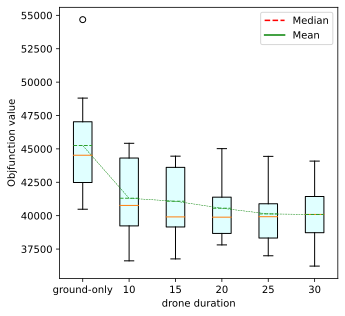

In [184]:
data_path = '.\eleme_output'
filename = 'eleme_b5_s15_duration_output.csv'
evaluate_data = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
grouped = evaluate_data.groupby('drone_duration')
dfs = [grouped.get_group(x) for x in grouped.groups]
s10 = dfs[0]
s15 = dfs[1]
s20 = dfs[2]
s25 = dfs[3]
s30 = dfs[4]


fig, ax = plt.subplots(figsize=(5,5))
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']],s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)
ax.boxplot(res,labels=labels,widths=0.4, showmeans=True, meanline=True, patch_artist=True,boxprops=dict(facecolor='#E0FFFF', edgecolor='black'))

# 添加折线
x_pos = list(range(1,1+len(labels)))
mean_values = np.mean(res,axis=0)
ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)

# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')

# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
ax.legend(handles, labels, loc='upper right')
ax.set_xlabel('drone duration')
ax.set_ylabel('Objfunction value')

In [188]:
data3

,Instance_name,courier number,drone_number,drone_duration,objf_c,rate_c,time_c,objf_d,rate_d,time_d
0,0301_rg_0_sec_0,4,1,20.0,41790.077330,0.00,0.000000,39132.697171,0.00,0.000000
1,0301_rg_0_sec_1,4,1,20.0,47014.735117,0.08,25.798575,43620.996046,0.02,1.273003
2,0301_rg_0_sec_2,4,1,20.0,40617.208310,0.06,17.181763,38585.877934,0.02,4.012911
3,0301_rg_0_sec_3,4,1,20.0,44830.774445,0.14,25.308416,40377.795760,0.06,5.029287
4,0301_rg_1_sec_0,4,1,20.0,40557.111532,0.00,0.000000,36006.131946,0.00,0.000000
5,0301_rg_1_sec_1,4,1,20.0,44528.913376,0.00,0.000000,39641.817673,0.00,0.000000
6,0301_rg_1_sec_2,4,1,20.0,42754.480187,0.06,47.853842,32426.452961,0.04,47.447348
7,0301_rg_1_sec_3,4,1,20.0,47348.735697,0.06,124.709138,36997.616079,0.04,126.515622
8,0301_rg_5_sec_0,4,1,20.0,44440.523186,0.00,0.000000,39303.173776,0.04,0.941430
9,0301_rg_5_sec_1,4,1,20.0,43414.182943,0.04,4.633270,40155.824650,0.04,1.910605


Text(0, 0.5, 'Objfunction value')

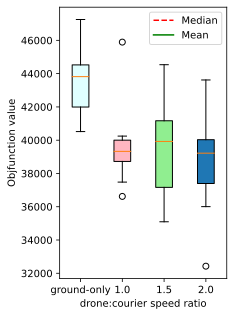

In [208]:
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']],s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)

# 创建数据
data_path = '.\eleme_output'

filename = 'eleme_b5_s10_output.csv'
data1 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b5_s15_output.csv'
data2 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b5_s20_output.csv'
data3 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)


# 绘制箱型图并上色
fig, ax = plt.subplots(figsize=(3,5))
bp1 = ax.boxplot(data1['objf_c'], positions=[1], widths=0.4, patch_artist=True)
bp2 = ax.boxplot(data1['objf_d'], positions=[2], widths=0.4, patch_artist=True)
bp3 = ax.boxplot(data2['objf_d'], positions=[3], widths=0.4, patch_artist=True)
bp5 = ax.boxplot(data3['objf_d'], positions=[4], widths=0.4, patch_artist=True)

# # 添加折线
# x_pos = list(range(1,1+len(labels)))
# mean_values = np.mean(res,axis=0)
# ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)


# 设置每组数据的颜色
colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
for bp, color in zip([bp1, bp2, bp3], colors):
    for patch in bp['boxes']:
        patch.set_facecolor(color)


# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')


# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
ax.legend(handles, labels, loc='upper right')

ax.set_xticklabels(['ground-only', '1.0', '1.5','2.0'])
ax.set_xlabel('drone:courier speed ratio')
ax.set_ylabel('Objfunction value')


Text(0, 0.5, 'Objfunction value')

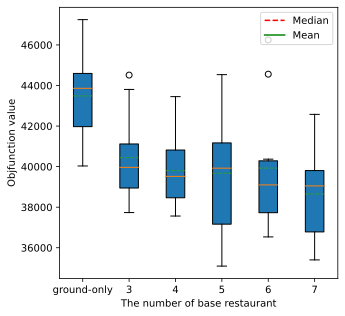

In [207]:
labels = ['ground-only','10','15','20','25','30']
res = np.concatenate([s10[['objf_c','objf_d']], s15[['objf_d']],s20[['objf_d']],s25[['objf_d']],s30[['objf_d']]], axis=1)

# 创建数据
data_path = '.\eleme_output'

filename = 'eleme_b3_s15_output.csv'
data1 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b4_s15_output.csv'
data2 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)

filename = 'eleme_b5_s15_output.csv'
data3 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
filename = 'eleme_b6_s15_output.csv'
data4 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
filename = 'eleme_b7_s15_output.csv'
data5 = pd.read_csv(os.path.join(data_path,filename),names=['Instance_name','courier number','drone_number','drone_duration','objf_c','rate_c','time_c','objf_d','rate_d','time_d'],index_col=False)
# 绘制箱型图并上色
fig, ax = plt.subplots(figsize=(5,5))
bp1 = ax.boxplot(data1['objf_c'], positions=[1], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp2 = ax.boxplot(data1['objf_d'], positions=[2], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp3 = ax.boxplot(data2['objf_d'], positions=[3], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data3['objf_d'], positions=[4], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data4['objf_d'], positions=[5], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp5 = ax.boxplot(data5['objf_d'], positions=[6], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
# # 添加折线
# x_pos = list(range(1,1+len(labels)))
# mean_values = np.mean(res,axis=0)
# ax.plot(x_pos, mean_values, linestyle='--', color='green',linewidth=0.5)


# 设置每组数据的颜色
# colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
# for bp, color in zip([bp1, bp2, bp3], colors):
#     for patch in bp['boxes']:
#         patch.set_facecolor(color)


# 添加均值线图例
mean_line = Line2D([0, 1], [0, 0], color='red', linestyle='--')
handles = [mean_line]
labels = ['Median']
ax.legend(handles, labels, loc='upper right')


# 添加中位线图例
median_line = Line2D([0, 1], [0, 0], color='green')
handles.append(median_line)
labels.append('Mean')
ax.legend(handles, labels, loc='upper right')

ax.set_xticklabels(['ground-only', '3', '4','5','6','7'])
ax.set_xlabel('The number of base restaurant')
ax.set_ylabel('Objfunction value')


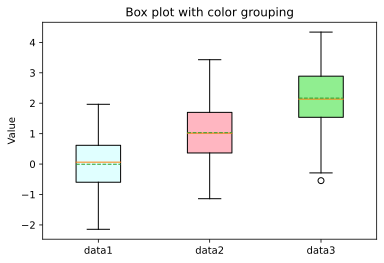

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 1, 100)
data3 = np.random.normal(2, 1, 100)

# 绘制箱型图并上色
fig, ax = plt.subplots()
bp1 = ax.boxplot(data1, positions=[1], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp2 = ax.boxplot(data2, positions=[2], widths=0.4, showmeans=True, meanline=True, patch_artist=True)
bp3 = ax.boxplot(data3, positions=[3], widths=0.4, showmeans=True, meanline=True, patch_artist=True)

# 设置每组数据的颜色
colors = ['#E0FFFF', '#FFB6C1', '#90EE90']
for bp, color in zip([bp1, bp2, bp3], colors):
    for patch in bp['boxes']:
        patch.set_facecolor(color)

# 设置坐标轴标签和标题
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['data1', 'data2', 'data3'])
ax.set_ylabel('Value')
ax.set_title('Box plot with color grouping')

# 显示图形
plt.show()
